In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tqdm import tqdm

In [2]:
from sklearn_extra.cluster import KMedoids
from scipy.stats import wasserstein_distance

In [3]:
df = pd.read_csv('E:\Documents\Google Drive\Eskwelabs\Sprint 5 - Capstone\data\consolidated_csv_01SUAL_G01.csv')
df.head()

,RUN_TIME,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,PRICE1,...,RR_BREAK_QUANTITY3,RR_UP3,RR_DOWN3,RR_BREAK_QUANTITY4,RR_UP4,RR_DOWN4,RR_BREAK_QUANTITY5,RR_UP5,RR_DOWN5,Unnamed: 46
0,06/26/2021,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,RTD,CLUZ,NLUZON,01SUAL_G01,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,SMEC,-10000.0,...,647.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Define the columns containing price-quantity pairs and timestamps
price_columns = [f'PRICE{i}' for i in range(1, 12)]
quantity_columns = [f'QUANTITY{i}' for i in range(1, 12)]

# Corrected line with tuple comprehension
selected_columns = ['RUN_TIME'] + [price for price in price_columns] + [quantity for quantity in quantity_columns]

In [5]:
pd.set_option('display.max_columns', None)

# Apply the selection to the filtered DataFrame
result_df = df[selected_columns]

#change Uppercase to lowercase
result_df.columns = result_df.columns.str.lower()

result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,quantity1,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,2214.38,2465.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,541.0,632.7,647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207765,09/25/2023 11:35:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,8000.08,NaN,0.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,NaN
207766,09/25/2023 11:40:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,8000.08,NaN,0.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,NaN
207767,09/25/2023 11:45:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,8000.08,NaN,0.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,NaN
207768,09/25/2023 11:50:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,8000.08,NaN,0.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,NaN


# FFill NaNs with last Price-Quantity Bid

In [6]:
# Forward fill from the first non-null value in each row for the price columns
result_df.loc[:, 'price1':'price11'] = result_df.loc[:, 'price1':'price11'].apply(lambda row: row.ffill(), axis=1)

# Forward fill from the first non-null value in each row for the quantity columns
result_df.loc[:, 'quantity1':'quantity11'] = result_df.loc[:, 'quantity1':'quantity11'].apply(lambda row: row.ffill(), axis=1)

## TAKES 30 SECONDS TO RUN
result_df

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,quantity1,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,06/26/2021,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,0.0,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
1,06/26/2021 12:05:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,0.0,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
2,06/26/2021 12:10:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,0.0,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
3,06/26/2021 12:15:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,0.0,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
4,06/26/2021 12:20:00 AM,-10000.0,-10000.0,2214.38,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,2465.69,0.0,541.0,632.7,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207765,09/25/2023 11:35:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,8000.08,8000.08,0.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,647.0
207766,09/25/2023 11:40:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,8000.08,8000.08,0.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,647.0
207767,09/25/2023 11:45:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,8000.08,8000.08,0.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,647.0
207768,09/25/2023 11:50:00 PM,-10000.0,-10000.0,5300.08,5700.08,6000.08,6500.08,7000.08,7400.08,7800.08,8000.08,8000.08,0.0,250.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,647.0,647.0


In [7]:
result_df.loc[:, 'run_time'] = result_df['run_time'].astype(str)

In [8]:
df_2022 = result_df[result_df['run_time'].str[6:10]=='2022']
df_2022.head()

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,quantity1,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
37575,01/01/2022,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,0.0,250.0,276.2,356.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
37576,01/01/2022 12:05:00 AM,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,0.0,250.0,276.2,356.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
37577,01/01/2022 12:10:00 AM,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,0.0,250.0,276.2,356.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
37578,01/01/2022 12:15:00 AM,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,0.0,250.0,276.2,356.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
37579,01/01/2022 12:20:00 AM,-10000.0,-10000.0,2854.0,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,0.0,250.0,276.2,356.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0


In [9]:
%%time
# Assuming df is your DataFrame with price-quantity pairs in each row
test_df = df_2022

# Reset the index of test_df
test_df.reset_index(drop=True, inplace=True)

# Create empty lists to store data for all stepwise curves
all_quantities = []
all_prices = []
all_intp_quantities = []
all_intp_prices = []

# Iterate through each row
for index, row in tqdm(test_df.iterrows(), total=len(test_df), desc='Processing rows'):
    # Extract price and quantity columns for the current row
    prices = row.filter(like='price')
    quantities = row.filter(like='quantity')

    # Sort data by quantity
    sorted_data = sorted(zip(quantities, prices))
    quantities, prices = zip(*sorted_data)

    # Interpolate prices for 'pre' step-wise interpolation
    step_fx = interp1d(quantities, prices, kind='previous', fill_value='extrapolate')

    # Get the original quantities for interpolation
    intp_quantities = np.array(quantities)

    # Get interpolated prices
    intp_prices = step_fx(intp_quantities)

    # Set a condition to handle quantities beyond the maximum in the raw data
    max_quantity_interval = max(quantities)
    intp_prices[intp_quantities > max_quantity_interval] = 33000

    # Append data to lists
    all_quantities.append(quantities)
    all_prices.append(prices)
    all_intp_quantities.append(intp_quantities)
    all_intp_prices.append(intp_prices)

Processing rows: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62192/62192 [00:21<00:00, 2929.81it/s]

CPU times: total: 21.4 s
Wall time: 21.2 s


In [10]:
# Convert the interpolated prices into price series
price_series = np.array(all_intp_prices)
price_series

array([[-10000.  , -10000.  ,   2854.  , ...,  15000.08,  15000.08,
         15000.08],
       [-10000.  , -10000.  ,   2854.  , ...,  15000.08,  15000.08,
         15000.08],
       [-10000.  , -10000.  ,   2854.  , ...,  15000.08,  15000.08,
         15000.08],
       ...,
       [-10000.  , -10000.  ,   9200.08, ...,   9300.08,   9300.08,
          9300.08],
       [-10000.  , -10000.  ,   9200.08, ...,   9300.08,   9300.08,
          9300.08],
       [-10000.  , -10000.  ,   9200.08, ...,   9300.08,   9300.08,
          9300.08]])

In [11]:
# # # Specify the CSV file path
# csv_file_path = 'E:\Documents\Google Drive\Eskwelabs\Sprint 5 - Capstone\data\consolidated_csv_01SUAL_G01_price_series_nointerp.csv'

# # # Save the array to a CSV file
# np.savetxt(csv_file_path, price_series, delimiter=',')

# print(f"Array has been saved to {csv_file_path}")

Array has been saved to E:\Documents\Google Drive\Eskwelabs\Sprint 5 - Capstone\data\consolidated_csv_01SUAL_G01_price_series_nointerp.csv


In [12]:
# Indices to plot (adjust as needed)
indices_to_plot = [0, 12, 1000, 6348, 11424, 20000, 30000, 40000, 62187]

Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62192/62192 [00:00<00:00, 1268082.38it/s]


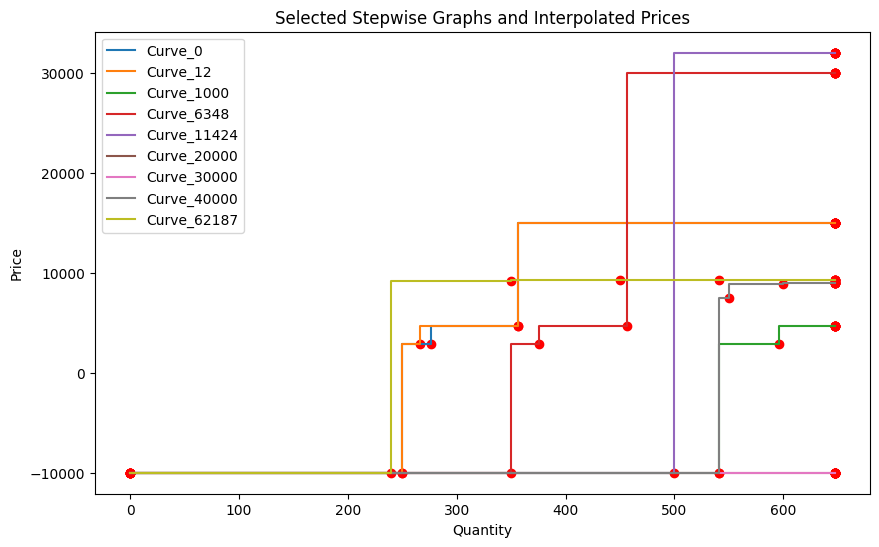

In [13]:
# Plot only the selected stepwise curves on a single graph
plt.figure(figsize=(10, 6))

for i, (quantities, prices, intp_quantities, intp_prices) in enumerate(tqdm(zip(all_quantities, all_prices, all_intp_quantities, all_intp_prices), total=len(all_quantities), desc='Processing')):
    if i in indices_to_plot:
        plt.step(quantities, prices, where='pre', label=f'Curve_{i}')
        plt.scatter(intp_quantities, intp_prices, color='red')

# Customize the plot as needed
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Selected Stepwise Graphs and Interpolated Prices')
plt.legend()
plt.show()

In [14]:
# Display the rows at specified indices
rows_to_display = test_df.loc[indices_to_plot]
rows_to_display

,run_time,price1,price2,price3,price4,price5,price6,price7,price8,price9,price10,price11,quantity1,quantity2,quantity3,quantity4,quantity5,quantity6,quantity7,quantity8,quantity9,quantity10,quantity11
0,01/01/2022,-10000.0,-10000.0,2854.00,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,0.0,250.0,276.2,356.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
12,01/01/2022 01:00:00 AM,-10000.0,-10000.0,2854.00,4638.61,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,15000.08,0.0,250.0,266.6,356.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
1000,01/04/2022 11:20:00 AM,-10000.0,-10000.0,2862.20,4646.81,4646.81,4646.81,4646.81,4646.81,4646.81,4646.81,4646.81,0.0,541.0,596.3,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
6348,01/23/2022 01:00:00 AM,-10000.0,-10000.0,2862.20,4646.81,30000.08,30000.08,30000.08,30000.08,30000.08,30000.08,30000.08,0.0,350.0,375.8,456.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
11424,02/09/2022 04:00:00 PM,-10000.0,-10000.0,32000.00,32000.00,32000.00,32000.00,32000.00,32000.00,32000.00,32000.00,32000.00,0.0,500.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
20000,03/14/2022 10:00:00 PM,-10000.0,-10000.0,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,0.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
30000,04/23/2022 06:10:00 PM,-10000.0,-10000.0,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,-10000.00,0.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
40000,05/28/2022 01:00:00 PM,-10000.0,-10000.0,7500.08,8900.08,9000.08,9000.08,9000.08,9000.08,9000.08,9000.08,9000.08,0.0,541.0,550.0,600.0,647.0,647.0,647.0,647.0,647.0,647.0,647.0
62187,12/31/2022 11:35:00 PM,-10000.0,-10000.0,9200.08,9260.08,9280.08,9300.08,9300.08,9300.08,9300.08,9300.08,9300.08,0.0,240.0,350.0,450.0,541.0,647.0,647.0,647.0,647.0,647.0,647.0


In [20]:
# Find the index where 'price5' first becomes equal to 30k
index_first_32000 = test_df[test_df['price5'] == 30000.08]['price5'].idxmax()
index_first_32000

6348

# [Archived] previous code

In [65]:
#Set Qmax
Q_max = 647.0

In [66]:
# Bidding curve sampling procedure
def bidding_curve_sampling(row):
    M = 11  # Set M to 10
    delta_q_i = Q_max / M
    q_sp = np.arange(0, Q_max + delta_q_i, delta_q_i)[:M]  # Adjust the range

    p_sp = []
    for i in range(1, M + 1):
        price_col = f'price{i}'
        quantity_col = f'quantity{i}'
        p_sp.append(row[price_col])

    return pd.Series({'P^SP': p_sp, 'q^SP': q_sp})

# Apply bidding curve sampling to each row (DU_i)
bidding_curve_df = result_df.apply(bidding_curve_sampling, axis=1)

# Unifying the data length by normalizing the bidding quantity
def normalize_bidding_curve(row):
    normalized_quantity = row['q^SP'] / Q_max
    return pd.Series({'q(m)': normalized_quantity, 'P^SP': row['P^SP']})

# Apply data normalization to each row
normalized_curve_df = bidding_curve_df.apply(normalize_bidding_curve, axis=1)

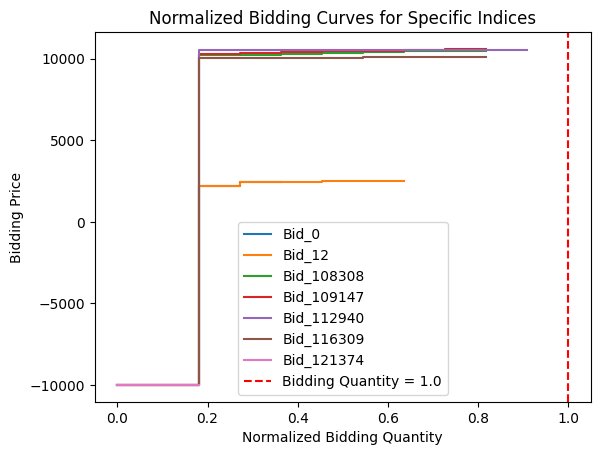

In [67]:
# Indices to plot (adjust as needed)
indices_to_plot = [0, 12, 108308, 109147, 112940, 116309, 121374]

# Plot the bidding curves for the specified indices using plt.step
for index, row in normalized_curve_df.loc[indices_to_plot].iterrows():
    plt.step(row['q(m)'], row['P^SP'], label=f'Bid_{index}', where='post')

plt.axvline(x=1.0, color='red', linestyle='--', label='Bidding Quantity = 1.0')

plt.ylabel('Bidding Price')
plt.xlabel('Normalized Bidding Quantity')
plt.title('Normalized Bidding Curves for Specific Indices')
plt.legend()
plt.show()


In [68]:
bidding_curve_df

,P^SP,q^SP
0,"[-10000.0, -10000.0, 2214.38, 2465.69, nan, na...","[0.0, 58.81818181818182, 117.63636363636364, 1..."
1,"[-10000.0, -10000.0, 2214.38, 2465.69, nan, na...","[0.0, 58.81818181818182, 117.63636363636364, 1..."
2,"[-10000.0, -10000.0, 2214.38, 2465.69, nan, na...","[0.0, 58.81818181818182, 117.63636363636364, 1..."
3,"[-10000.0, -10000.0, 2214.38, 2465.69, nan, na...","[0.0, 58.81818181818182, 117.63636363636364, 1..."
4,"[-10000.0, -10000.0, 2214.38, 2465.69, nan, na...","[0.0, 58.81818181818182, 117.63636363636364, 1..."
...,...,...
207765,"[-10000.0, -10000.0, 5300.08, 5700.08, 6000.08...","[0.0, 58.81818181818182, 117.63636363636364, 1..."
207766,"[-10000.0, -10000.0, 5300.08, 5700.08, 6000.08...","[0.0, 58.81818181818182, 117.63636363636364, 1..."
207767,"[-10000.0, -10000.0, 5300.08, 5700.08, 6000.08...","[0.0, 58.81818181818182, 117.63636363636364, 1..."
207768,"[-10000.0, -10000.0, 5300.08, 5700.08, 6000.08...","[0.0, 58.81818181818182, 117.63636363636364, 1..."


In [69]:
# Access the 'q^SP' column for the 12th index
contents = bidding_curve_df.at[0, 'q^SP']

# Print the contents
print("Contents of index in 'q^SP' column:")
print(contents)

Contents of index in 'q^SP' column:
[  0.          58.81818182 117.63636364 176.45454545 235.27272727
 294.09090909 352.90909091 411.72727273 470.54545455 529.36363636
 588.18181818]


In [70]:
normalized_curve_df

,q(m),P^SP
0,"[0.0, 0.09090909090909091, 0.18181818181818182...","[-10000.0, -10000.0, 2214.38, 2465.69, nan, na..."
1,"[0.0, 0.09090909090909091, 0.18181818181818182...","[-10000.0, -10000.0, 2214.38, 2465.69, nan, na..."
2,"[0.0, 0.09090909090909091, 0.18181818181818182...","[-10000.0, -10000.0, 2214.38, 2465.69, nan, na..."
3,"[0.0, 0.09090909090909091, 0.18181818181818182...","[-10000.0, -10000.0, 2214.38, 2465.69, nan, na..."
4,"[0.0, 0.09090909090909091, 0.18181818181818182...","[-10000.0, -10000.0, 2214.38, 2465.69, nan, na..."
...,...,...
207765,"[0.0, 0.09090909090909091, 0.18181818181818182...","[-10000.0, -10000.0, 5300.08, 5700.08, 6000.08..."
207766,"[0.0, 0.09090909090909091, 0.18181818181818182...","[-10000.0, -10000.0, 5300.08, 5700.08, 6000.08..."
207767,"[0.0, 0.09090909090909091, 0.18181818181818182...","[-10000.0, -10000.0, 5300.08, 5700.08, 6000.08..."
207768,"[0.0, 0.09090909090909091, 0.18181818181818182...","[-10000.0, -10000.0, 5300.08, 5700.08, 6000.08..."


In [71]:
# Access the 'q^SP' column for the 12th index
cont = normalized_curve_df.at[0, 'q(m)']

# Print the contents
print("Contents of index in 'q(m)' column:")
print(cont)

Contents of index in 'q(m)' column:
[0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091]
